# **Interactive visualization of geographical data**

# **Choropleth map**

A choropleth map is a map of a region with different divisions colored to indicate the value of a specific feature in that division. This division may be a country, state, district, or any other well-documented area. 

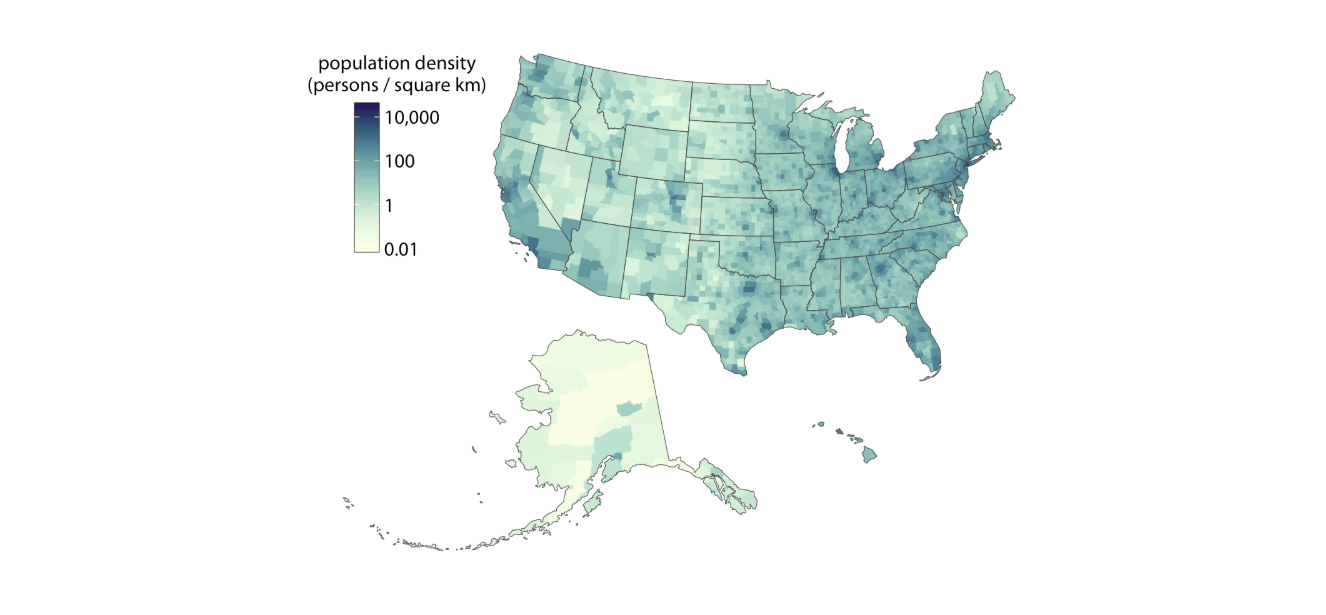

## Dataset: Our World in Data

We will use the internet usage statistics published on *Our World in Data* and present the percentage of population using the Internet in each country from 1990 to 2017. 

![대체 텍스트](https://drive.google.com/uc?export=view&id=1bSQHUbADdJO309RVShUMY6DFa-mXZIhI)

* ISO 3166 country codes: Internationally recognized codes that designate every country in the world

  ex) AFG- Afghanistan, AGO- Angola

## Creating worldwide choropleth map

We will first create a worldwide choropleth map that shows the percentage of population using the Internet in 2016.

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
internet_usage_url = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/share-of-individuals-using-the-internet.csv'
internet_usage_df = pd.read_csv(internet_usage_url)
internet_usage_df = internet_usage_df.sort_values('Year')
internet_usage_df.head()

Country  ... Individuals using the Internet (% of population)
5347  Syrian Arab Republic  ...                                              0.0
718                Burundi  ...                                              0.0
5493                  Togo  ...                                              0.0
572               Botswana  ...                                              0.0
3414              Maldives  ...                                              0.0

[5 rows x 4 columns]

In [ ]:
internet_usage_2016 = internet_usage_df.loc[internet_usage_df['Year']==2016]
internet_usage_2016.head()

Country  ... Individuals using the Internet (% of population)
783                   Cambodia  ...                                        32.398452
1287                   Denmark  ...                                        96.967785
916   Central African Republic  ...                                         4.000000
833                     Canada  ...                                        91.160000
130        Antigua and Barbuda  ...                                        73.000000

[5 rows x 4 columns]

In [ ]:
fig = px.choropleth(internet_usage_2016, 
                    locations='Code', # column containing ISO 3166 country codes
                    color='Individuals using the Internet (% of population)', # column by which to color-code
                    hover_name='Country', # column to display hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

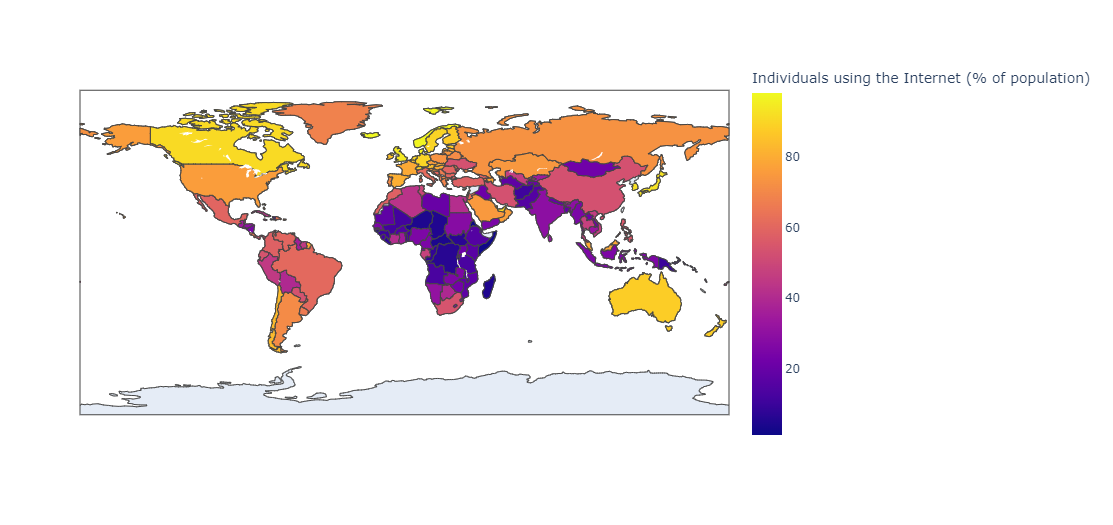

## Tweaking worldwide choropleth map 

We will make some simple changes to the layout of the choropleth map, such as zooming into a specific region, changing the map projection from flat to natural earth, and adding an animation over the years.

In [ ]:
# setting geo_scope to Africa
fig.update_layout(
    title_text='Internet usage across the African Continent (% population) - 2016', 
    geo_scope='africa'
    # one of 'world', 'usa', 'europe', 'asia', 'africa', 'north america', or 'south america' (default is 'world')
)

fig.show()

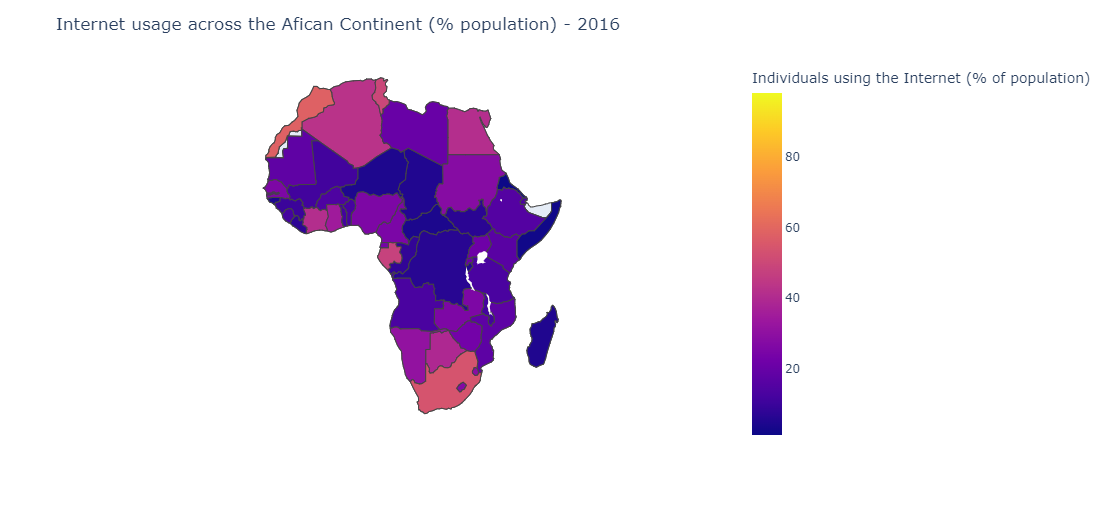

In [ ]:
# changing map projection to natural earth
fig.update_layout(
    geo_scope='world', 
    title_text='Internet usage across the world (% population) - 2016', 
    geo=dict(projection={'type': 'natural earth'})
    # one of 'equirectangular', 'mercator', 'orthographic', 'natural earth', 
    # 'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 
    # 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 
    # 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 
    # 'albers usa', 'winkel tripel', 'aitoff', 'sinusoidal' (default depends on scope)
)

fig.show()

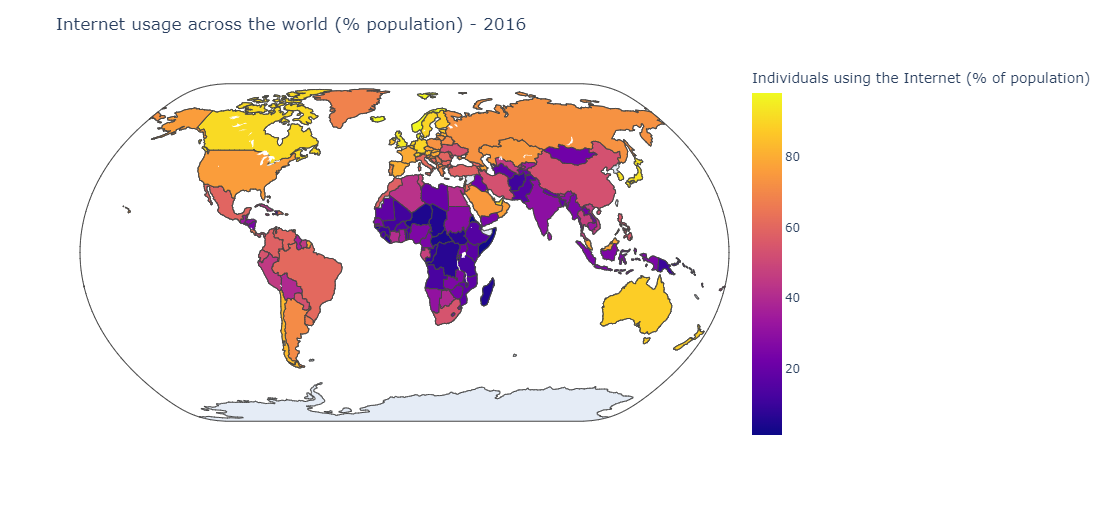

In [ ]:
# adding animation over the years
fig = px.choropleth(internet_usage_df, 
                    locations='Code', 
                    color='Individuals using the Internet (% of population)', 
                    hover_name='Country', 
                    color_continuous_scale=px.colors.sequential.Plasma, 
                    animation_frame='Year', 
                    range_color=[internet_usage_df['Individuals using the Internet (% of population)'].min(), 
                                 internet_usage_df['Individuals using the Internet (% of population)'].max()])

fig.show()

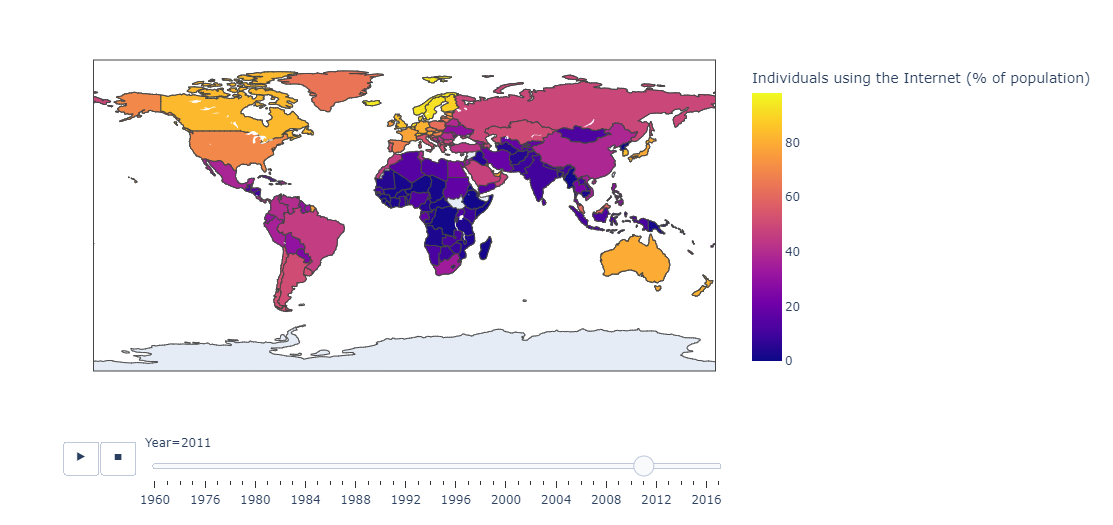

# **Plots on geographical map**

## Dataset: Walmart store openings

This dataset contains information on all Walmart stores in the USA from 1962 to 2006. We will create a USA map, then plot a scatter plot and a bubble plot on the map for the Walmart stores.

This dataset is originally from this research: http://users.econ.umn.edu/~holmes/data/WalMart/store_openings.html

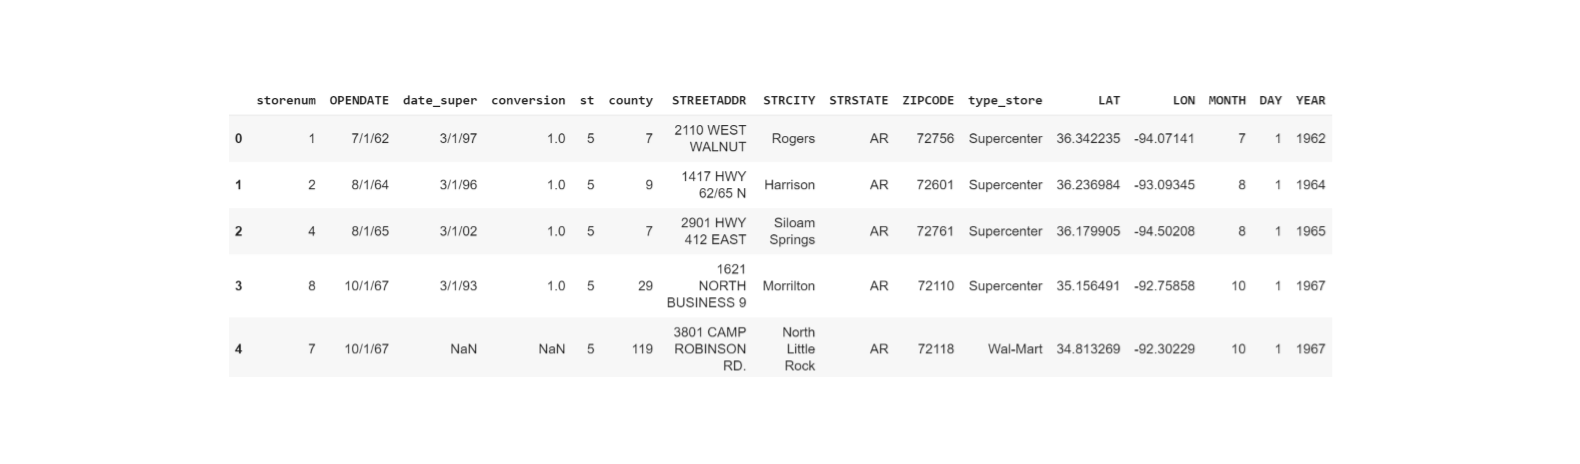

## Scatter plot

In [ ]:
walmart_loc_url = 'https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv'
walmart_loc_df = pd.read_csv(walmart_loc_url)
walmart_loc_df.head()

# STR = Store
# STRSTATE = State of store
# STRCITY = City of store 

storenum OPENDATE date_super  conversion  ...       LON  MONTH DAY  YEAR
0         1   7/1/62     3/1/97         1.0  ... -94.07141      7   1  1962
1         2   8/1/64     3/1/96         1.0  ... -93.09345      8   1  1964
2         4   8/1/65     3/1/02         1.0  ... -94.50208      8   1  1965
3         8  10/1/67     3/1/93         1.0  ... -92.75858     10   1  1967
4         7  10/1/67        NaN         NaN  ... -92.30229     10   1  1967

[5 rows x 16 columns]

In [ ]:
fig = px.scatter_geo(walmart_loc_df, 
                     lon='LON', 
                     lat='LAT', 
                     hover_name='STREETADDR')

fig.update_layout(
    title='Walmart stores across USA', 
    geo_scope='usa'
)

fig.show()

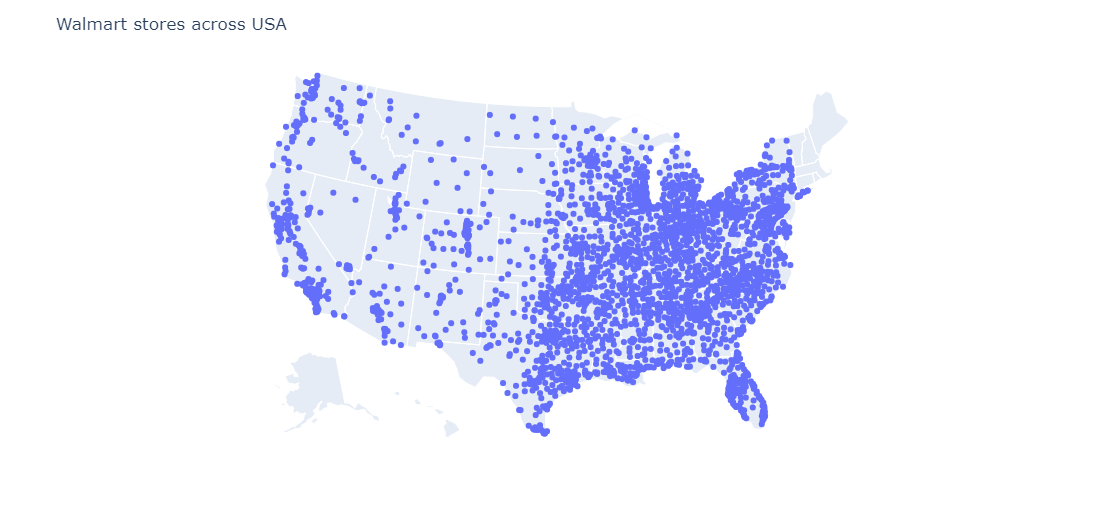

## Bubble plot

Since the eastern side of the map appears to be very densely populated with Walmart stores, it might be a good idea to **show an aggregate feature**, such as the count of Walmart stores across different states. **Bubble plots** are great for this kind of visualization.

The bubble sizes depend on the value they are indicating – the bigger the value, the bigger the bubble.

In [ ]:
# computing number of Walmart stores per state
walmart_stores_by_state = walmart_loc_df.groupby('STRSTATE').count()['storenum'].reset_index().rename(columns={'storenum': 'NUM_STORES'})
walmart_stores_by_state.head()

STRSTATE  NUM_STORES
0       AL          90
1       AR          81
2       AZ          55
3       CA         159
4       CO          56

In [ ]:
fig = px.scatter_geo(walmart_stores_by_state, 
                     locations='STRSTATE', 
                     size='NUM_STORES', 
                     locationmode='USA-states', 
                     hover_name='STRSTATE', 
                     size_max=45)

fig.update_layout(
    title_text='Walmart stores across states in USA', 
    geo_scope='usa'
)

fig.show()

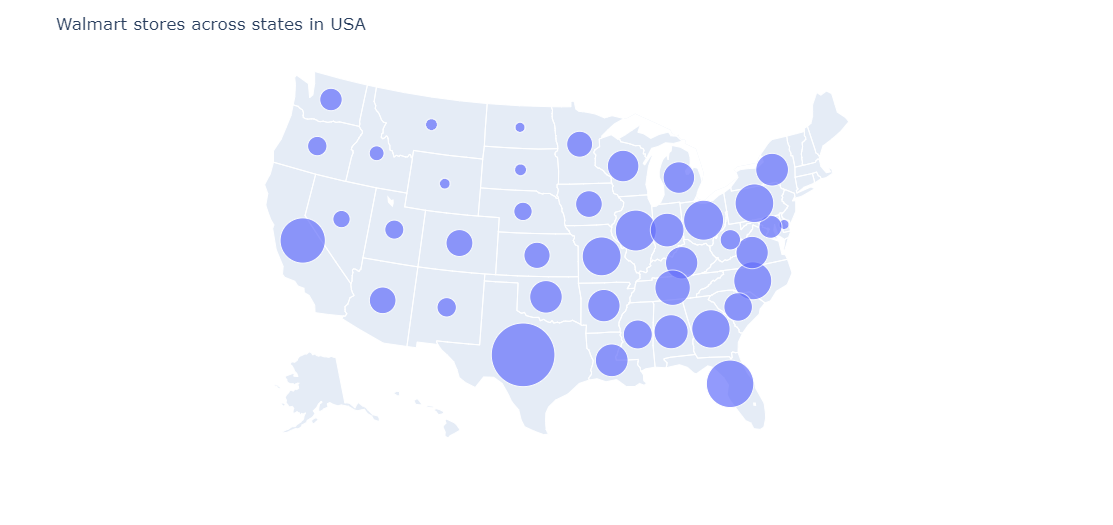

## Adding animation to bubble plot

In [ ]:
# grouping dataframe by YEAR and STRSTATE and counting number of stores
walmart_stores_by_year_state = walmart_loc_df.groupby(['YEAR', 'STRSTATE']).count()['storenum'].reset_index().rename(columns={'storenum': 'NUM_STORES'})
walmart_stores_by_year_state.head()

YEAR STRSTATE  NUM_STORES
0  1962       AR           1
1  1964       AR           1
2  1965       AR           1
3  1967       AR           2
4  1968       AR           1

In [ ]:
fig = px.scatter_geo(walmart_stores_by_year_state, 
                     locations='STRSTATE', 
                     size='NUM_STORES', 
                     locationmode = 'USA-states', 
                     hover_name='STRSTATE', 
                     size_max=45, 
                     animation_frame='YEAR', 
                     color='NUM_STORES', 
                     color_continuous_scale=px.colors.sequential.Plasma, 
                     range_color=[walmart_stores_by_year_state['NUM_STORES'].min(), 
                                  walmart_stores_by_year_state['NUM_STORES'].max()])

fig.update_layout(
    title_text='Newly opened Walmart stores in a given year across states in USA', 
    geo_scope='usa'
)

fig.show()

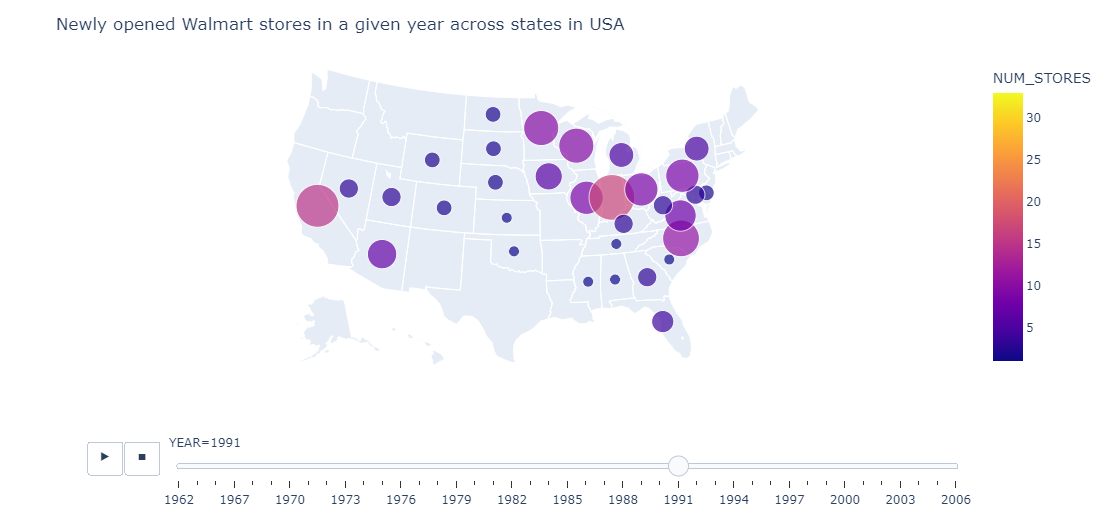

# **Visualizing & clustering mobility data**

We will visualize GPS data on a map, using Mapbox library.

## Dataset: Location traces from K-Emophone dataset

To handle mobility data, we will use a sample location trace, which consists of a series of GPS coordinates, i.e., latitude and longitude, and collection timestamps. We will use one user's data (P714) from K-Emophone dataset.

In [ ]:
import plotly.graph_objs as go

In [ ]:
loc_df = pd.read_csv('P714_location.csv')
loc_df = loc_df[['timestamp','latitude', 'longitude']]
loc_df.head()

timestamp   latitude   longitude
0  1557274207854  36.373779  127.357210
1  1557274267935  36.373821  127.357181
2  1557274439100  36.373746  127.357165
3  1557274489940  36.373789  127.357184
4  1557274949391  36.373724  127.357276

## What is Mapbox?

![대체 텍스트](https://drive.google.com/uc?export=view&id=13YSOVVBRJXgwsMMBjDg11GKlG4IgLwwD)

Mapbox is a platform used across industries to create custom applications that solve problems with maps, data, and spatial analysis. You can make your own style of map!

To plot GPS coordinates, we need a [Mapbox](https://mapbox.com) access token.

In [ ]:
MAPBOX_ACCESS_TOKEN = 'pk.eyJ1IjoiZ2VvcmdlbW0iLCJhIjoiY2t6cWVyYnZ4MGpjcTJ3cnhueWhoMHU5cyJ9.WKkKUPdIkTIHnDv7nXFMDQ'

fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
        lat=loc_df.loc[:, 'latitude'], 
        lon=loc_df.loc[:, 'longitude']
    )
)

fig.update_layout(
    autosize=True, 
    mapbox=go.layout.Mapbox(
        accesstoken=MAPBOX_ACCESS_TOKEN, 
        center=go.layout.mapbox.Center(
            lat=loc_df.loc[0, 'latitude'], 
            lon=loc_df.loc[0, 'longitude']
        ), 
        zoom=12
    )
)

fig.show()

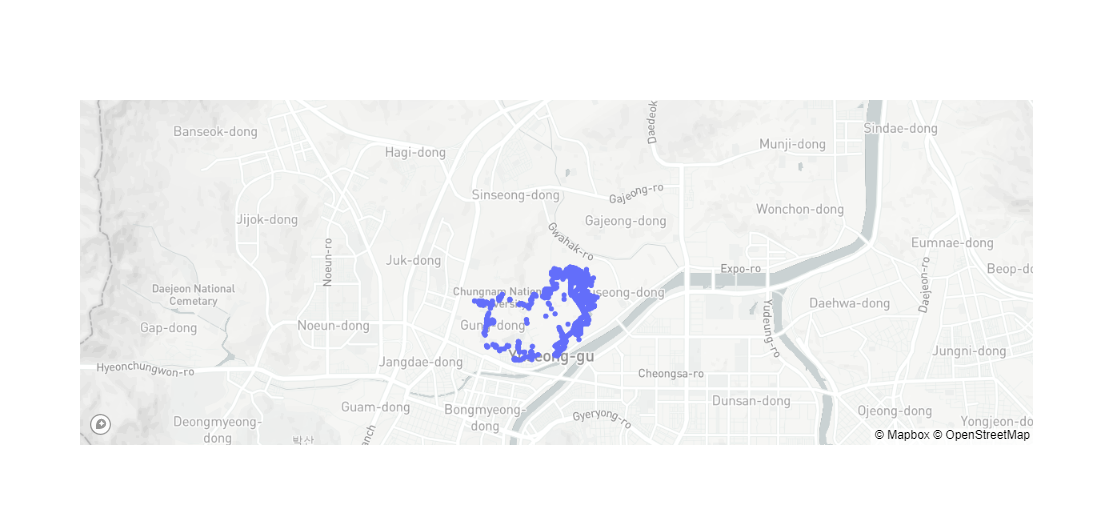

Let's change the map style.

There are several map styles: 
'white-bg', 'open-street-map', 'carto-positron', 'carto-darkmatter', 'stamen-terrain', 'stamen-toner', 'stamen-watercolor', 'basic', 'streets', 'outdoors', 'light', 'dark', 'satellite', 'satellite-streets'

In [ ]:
fig.update_layout(mapbox_style='satellite')

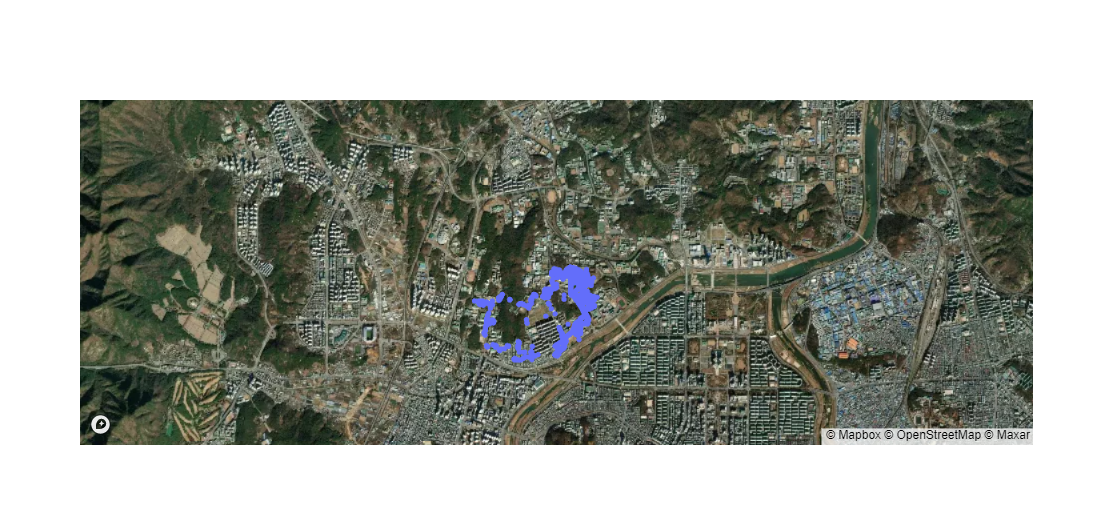

In [ ]:
fig.update_layout(mapbox_style='open-street-map')

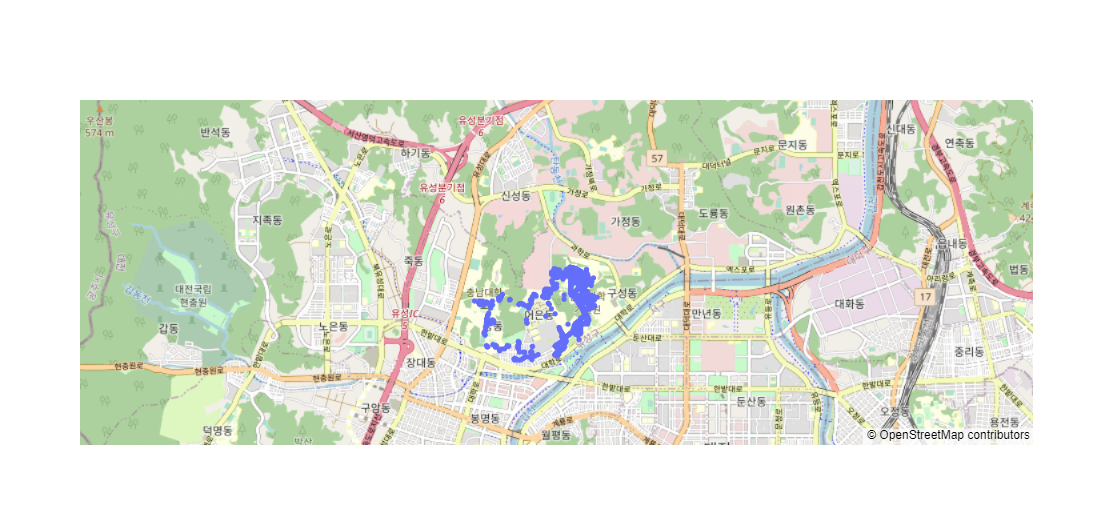

## Clustering GPS coordinates

* The purpose of clustering GPS coordinates is to get information about locations, e.g. where people often visit or live
* In clustering, we define the distance metric that measures the distance between two points
* After clustering, we label each cluster

We will use DBSCAN spatial clustering algorithm.

**What is DBSCAN?** (Density-Based Spatial Clustering of Applications with Noise)

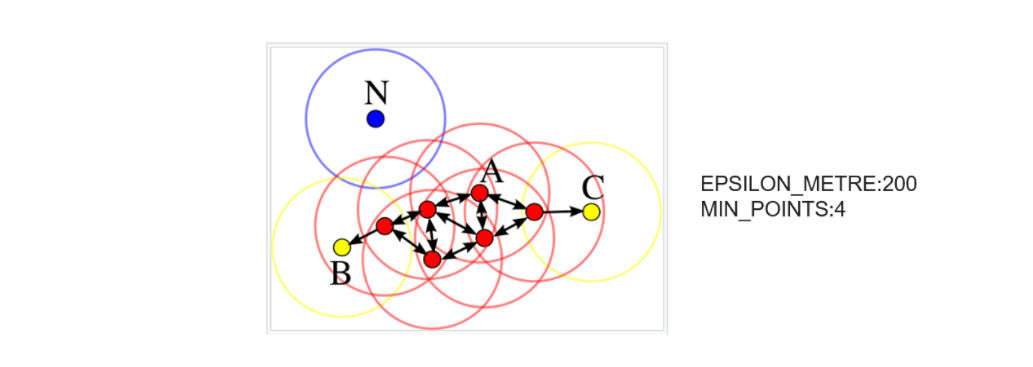

* DBSCAN is one of the most popular clustering algorithms, where a cluster is formed if a point has a *sufficient number of other points within a given distance*
* Here, the points within the given distance form a *neighborhood*
* In this algorithm, we define three parameters:
  * $\epsilon$: distance to determine if two points are in a neighborhood
  * $pt_{min}$: mininum number of points in a neighborhood for a given point to be considered the center of a cluster
  * Distance metric: metric to measure distance between two points
* The Euclidean distance is widely used, but for GPS coordinates, we use [Haversine distance](https://en.wikipedia.org/wiki/Haversine_formula) (distance between two points on a sphere)

![대체 텍스트](https://drive.google.com/uc?export=view&id=1T9T47qrcd_fe38drwgcagXXaZx7gy73w)

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
EPSILON_METRE = 50 # @param {type: 'slider', min: 25, max: 500, step: 25}
MIN_POINTS = 5 # @param {type: 'slider', min: 5, max: 30, step: 1}
R = 63710088 # earth radius in metres

cluster = DBSCAN(eps=EPSILON_METRE / R, # maximum angle between two samples
                 min_samples=MIN_POINTS, 
                 metric='haversine', 
                 algorithm='ball_tree' # only Ball Tree can handle haversine distance
                 )

loc_degrees = loc_df.loc[:, ['latitude', 'longitude']].to_numpy()
loc_radians = np.radians(loc_degrees) # to use haversine distance
labels = cluster.fit_predict(loc_radians)

clusters_df = pd.DataFrame(
    np.column_stack([loc_df.to_numpy(), labels]), 
    columns=['timestamp', 'latitude', 'longitude', 'label']
)

clusters_df.head()

timestamp   latitude   longitude  label
0  1.557274e+12  36.373779  127.357210    0.0
1  1.557274e+12  36.373821  127.357181    0.0
2  1.557274e+12  36.373746  127.357165    0.0
3  1.557274e+12  36.373789  127.357184    0.0
4  1.557275e+12  36.373724  127.357276    0.0

In [ ]:
fig = go.Figure()

for label in clusters_df.loc[:, 'label'].unique():
    cluster_df = clusters_df.loc[lambda x: x['label']==label, :]
    fig.add_trace(
        go.Scattermapbox(
            lat=cluster_df.latitude, 
            lon=cluster_df.longitude, 
            mode='markers', 
            marker=go.scattermapbox.Marker(
              size=5, 
              autocolorscale=True
            )
        )
    )
  
fig.update_layout(
    autosize=True, 
    mapbox=go.layout.Mapbox(
        accesstoken=MAPBOX_ACCESS_TOKEN, 
        center=go.layout.mapbox.Center(
            lat=clusters_df.loc[0, 'latitude'], 
            lon=clusters_df.loc[0, 'longitude']
        ), 
        zoom=12
    )
)

fig.show()

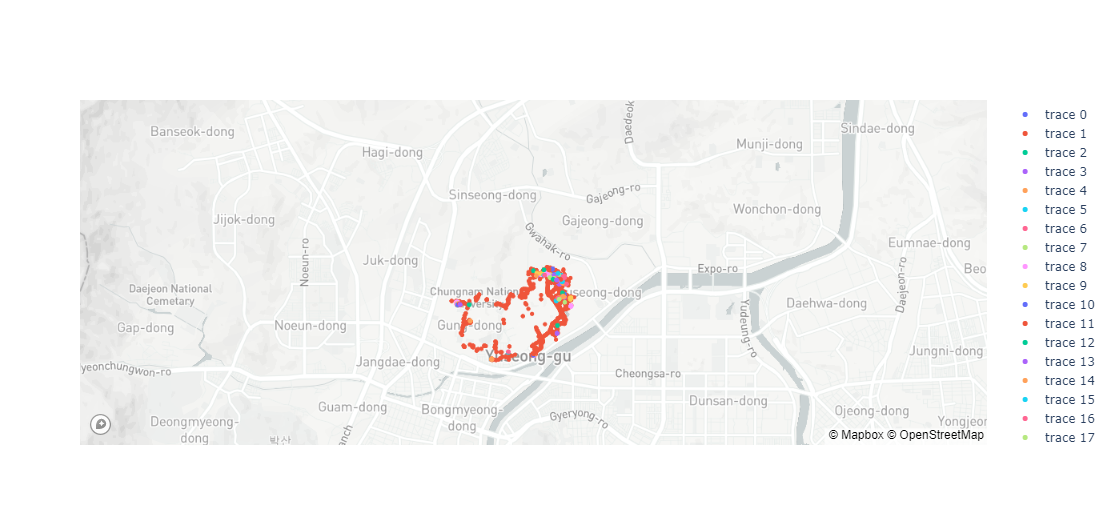

## Top 5 clusters ('hot' places)

In [ ]:
labels = clusters_df.loc[:, 'label'].unique()
# removing label for points without cluster
labels = np.delete(labels, np.where(labels==-1))

# getting number of points in each cluster
cluster_sizes = []
for label in labels:
    cluster_df = clusters_df.loc[lambda x: x['label']==label, :]
    cluster_sizes.append(cluster_df.shape[0])

cluster_sizes_df = pd.DataFrame({'label': labels, 'size': cluster_sizes})
cluster_sizes_df = cluster_sizes_df.sort_values(by='size', ascending=False, ignore_index=True)
top_5_clusters_df = cluster_sizes_df.iloc[:5,:]
top_5_clusters_df

label  size
0    0.0  1549
1    2.0   143
2   70.0   136
3   18.0   132
4   24.0   122

## Centre of each cluster

In [ ]:
fig = go.Figure()

top_5_clusters = top_5_clusters_df['label']

mean_lats = []
mean_lons = []

for label in top_5_clusters:
    cluster_df = clusters_df.loc[clusters_df['label']==label]
    mean_lat = cluster_df['latitude'].mean()
    mean_lon = cluster_df['longitude'].mean()
    mean_lats.append(mean_lat)
    mean_lons.append(mean_lon)

    fig.add_trace(
        go.Scattermapbox(
              lat=[mean_lat], 
              lon=[mean_lon], 
              mode='markers', 
              marker=go.scattermapbox.Marker(
                  size=10, 
                  symbol='marker', 
                  autocolorscale=True
              )
        )
    )

top_5_clusters_df['mean_lat'] = mean_lats
top_5_clusters_df['mean_lon'] = mean_lons

fig.update_layout(
    autosize=True, 
    mapbox=go.layout.Mapbox(
        accesstoken=MAPBOX_ACCESS_TOKEN, 
        center=go.layout.mapbox.Center(
            lat=top_5_clusters_df['mean_lat'].mean(), 
            lon=top_5_clusters_df['mean_lon'].mean()
        ), 
        zoom=13.5
    )
)

fig.show()

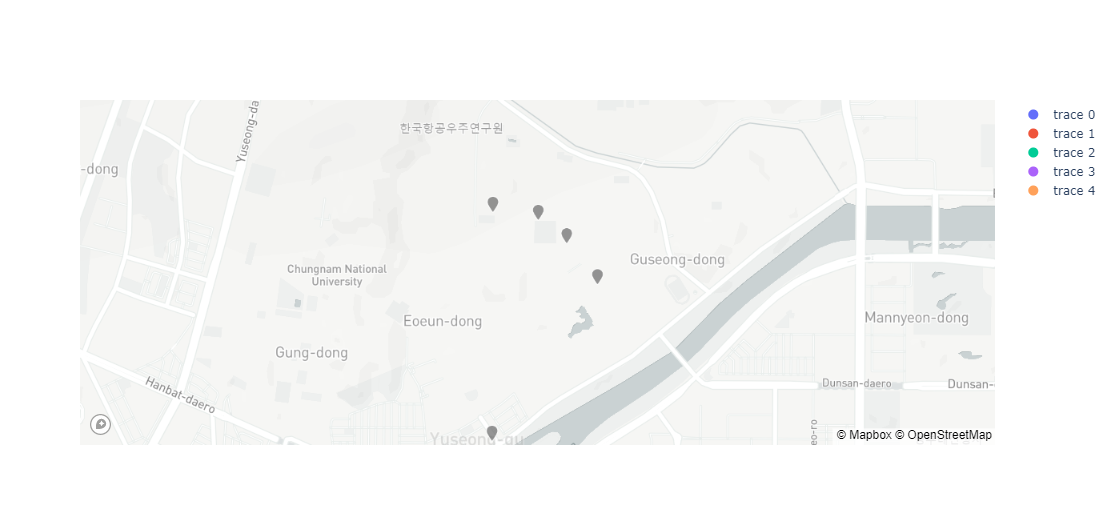

## Adding animation

In [ ]:
# data from 2019-05-08 to 2019-05-12
loc_df['datetime'] = pd.to_datetime(loc_df['timestamp'], unit='ms')
loc_df1 = loc_df.loc[(loc_df['datetime']>='2019-05-08 00:00:00.000') & (loc_df['datetime']<='2019-05-13 00:00:00.000')]
loc_df1.set_index('datetime', inplace=True)
loc_df1.head()

timestamp   latitude   longitude
datetime                                                     
2019-05-08 00:10:07.854  1557274207854  36.373779  127.357210
2019-05-08 00:11:07.935  1557274267935  36.373821  127.357181
2019-05-08 00:13:59.100  1557274439100  36.373746  127.357165
2019-05-08 00:14:49.940  1557274489940  36.373789  127.357184
2019-05-08 00:22:29.391  1557274949391  36.373724  127.357276

In [ ]:
# resampling the timestamp as 1 hour and using the first point for each resampling interval
loc_df2 = pd.DataFrame()
loc_df2['lat_1h_first'] = loc_df1.latitude.resample('1H').first()
loc_df2['lon_1h_first'] = loc_df1.longitude.resample('1H').first()
loc_df2['H'] = loc_df2.index.hour
loc_df2.head()

lat_1h_first  lon_1h_first  H
datetime                                          
2019-05-08 00:00:00     36.373779    127.357210  0
2019-05-08 01:00:00     36.373401    127.357379  1
2019-05-08 02:00:00     36.373333    127.362459  2
2019-05-08 03:00:00     36.373750    127.359305  3
2019-05-08 04:00:00     36.370408    127.362427  4

In [ ]:
# showing movement over time
px.set_mapbox_access_token(MAPBOX_ACCESS_TOKEN)

fig = px.scatter_mapbox(loc_df2, 
                        lat=loc_df2.lat_1h_first, 
                        lon=loc_df2.lon_1h_first, 
                        animation_frame='H', 
                        zoom=13.5)

fig.show()

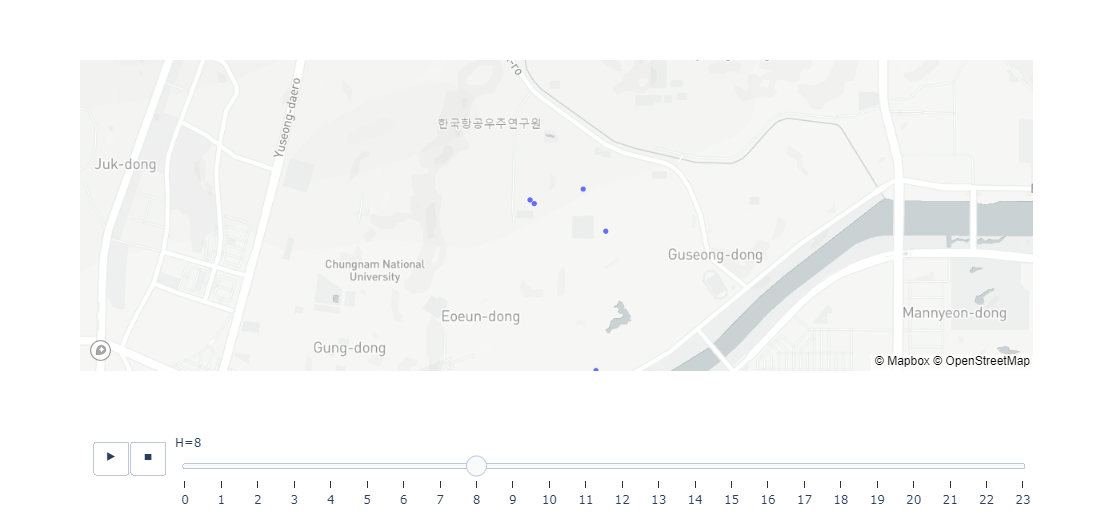